In [26]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

### Load Data

In [25]:
folder = "/Volumes/lsa-nwalter/Bisal_Halder_turbo/RAW_DATA/20240613_UGD_ER_ALEX_exposure_time_500ms"
os.chdir(folder)

lst_fname_ER = [f for f in os.listdir(".") if f.endswith("-even-bandpass.tif")]
lst_fname_condensate = [f for f in os.listdir(".") if f.endswith("-odd-bandpass.tif")]

In [5]:
fontsize = 18

### Functions

In [3]:
def weighted_Pearson(video1_flatten, video2_flatten, weights):
    # calculate mean for images and weights
    mean_video1 = np.sum(video1_flatten * weights) / np.sum(weights)
    mean_video2 = np.sum(video2_flatten * weights) / np.sum(weights)
    mean_weights = np.mean(weights)

    # calculate weighted covariance and variances
    cov = np.sum(
        weights * (video1_flatten - mean_video1) * (video2_flatten - mean_video2)
    ) / np.sum(weights)
    var_video1 = np.sum(weights * (video1_flatten - mean_video1) ** 2) / np.sum(weights)
    var_video2 = np.sum(weights * (video2_flatten - mean_video2) ** 2) / np.sum(weights)

    # calculate weighted correlation
    weighted_corr = cov / np.sqrt(var_video1 * var_video2)

    return weighted_corr

### ER-condensate

In [32]:
lst_weighted_corr = []

for fname_ER in track(lst_fname_ER):
    fname_condensate = fname_ER[:-18] + "-odd-bandpass.tif"
    video1 = imread(fname_condensate)
    video2 = imread(fname_ER)
    video1_flatten = video1.flatten()
    video2_flatten = video2.flatten()
    weights = np.ones_like(video1_flatten)
    weighted_corr = weighted_Pearson(video1_flatten, video2_flatten, weights)
    lst_weighted_corr.append(weighted_corr)

Output()

In [33]:
lst_weighted_corr, lst_fname_ER

([0.0937363881991795,
  0.04311959685964204,
  0.08985989554724255,
  0.08202358659075192,
  0.3814155227140921],
 ['20240613_UGD_ER_405_7_532_5_2x_rep1_FOV-3-even-bandpass.tif',
  '20240613_UGD_ER_405_7_532_5_2x_rep1_FOV-2-even-bandpass.tif',
  '20240613_UGD_ER_405_7_532_5_1x_rep1_FOV-even-bandpass.tif',
  '20240613_UGD_ER_405_7_532_5_2x_rep1_FOV-1-even-bandpass.tif',
  '20240613_UGD_ER_405_7_532_5_2x_rep1_FOV-even-bandpass.tif'])

NameError: name 'fontsize' is not defined

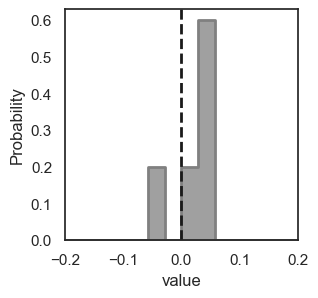

In [6]:
pcc_abs_max = 0.2
plt.figure(figsize=(3, 3))
df = pd.DataFrame({"value": lst_weighted_corr}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
# plt.xticks([-0.5, 0.5])
# plt.ylim(0, 0.27)
# plt.yticks([0, 0.1, 0.2])
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "weighted_pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight"
)
print(np.mean(lst_weighted_corr), sem(lst_weighted_corr))